# **DATA INSPECTION**

### Imports

In [1]:
import os
import re
import glob
import random
import yaml

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

import IPython.display as display
from PIL import Image
import cv2 # OpenCV lib

In [12]:
# # this is processing all the images one by one.
# def display_image(image_path, print_info=True, hide_axis=False):
#     if isinstance(image_path, str):  # Check if it's a file path
#         img = Image.open(image_path)
#         plt.imshow(img)
#     elif isinstance(image_path, np.ndarray):  # Check if it's a NumPy array
#         image = image_path[..., ::-1]  # BGR to RGB
#         img = Image.fromarray(image)
#         plt.imshow(img)
#     else:
#         raise ValueError("Unsupported image format")

#     if print_info:
#         print('Type:', type(img), '\n')
#         print('Shape:', np.array(img).shape, '\n')

#     if hide_axis:
#         plt.axis('off')

#     plt.show()

## Image Quality check

In [13]:
def plot_num_img(folder_path, num_img=20):
    # getting the files into list
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]
    
    # Checking if we have enough images in the folder
    if len(image_files) < num_img:
        raise ValueError('Not enough images')
    
    # Random Selection of the images
    # selected_images = random.sample(image_files, num_img)
    selected_images = image_files[:num_img]
    
    # Create a subplot grid
    num_cols = 5
    num_rows = (num_img + num_cols -1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    
    axes = axes.flatten()
    
    for i, file_name in enumerate(selected_images):
        img = Image.open(os.path.join(folder_path, file_name))

        axes[i].imshow(img)
        axes[i].axis('off')
        # axes[i].set_title(file_name)
        
    plt.tight_layout()
    plt.show()
    
def process_images(image_folder_path, num_img=20):
    if os.access(image_folder_path, os.R_OK):
        print(f'Processing images in {image_folder_path}')
        plot_num_img(image_folder_path, num_img)
    else:
        print(f'Cannot access {image_folder_path}. Please check if the path exists and you have read permission.')

Processing images in C:\Users\GGPC\Capstone\project_Capstone_Project\data\images\train


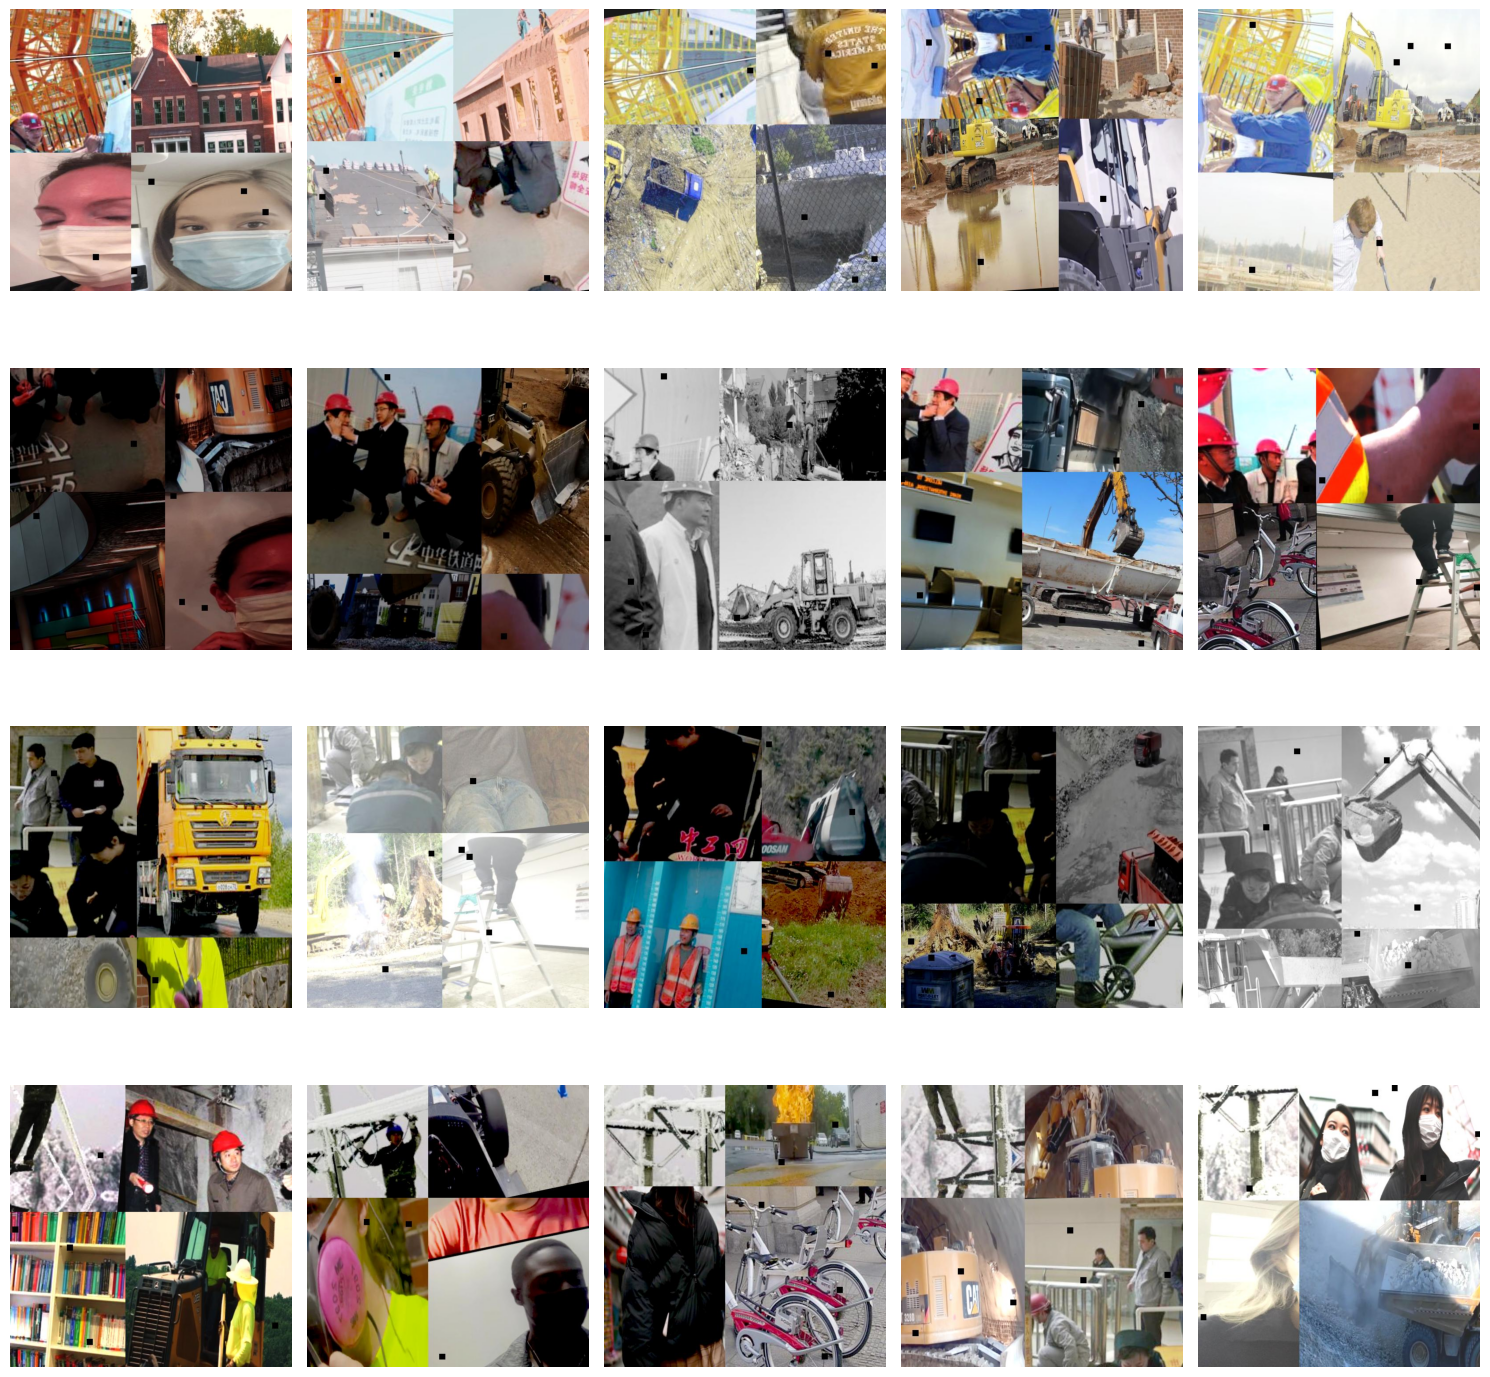

In [14]:
train_image_path = r'C:\Users\GGPC\Capstone\project_Capstone_Project\data\images\train'

process_images(train_image_path, num_img=20)

Processing directory: C:\Users\GGPC\Capstone\project_Capstone_Project\data\annotations\test\Test Labels
Processing directory: C:\Users\GGPC\Capstone\project_Capstone_Project\data\annotations\train\Train Labels
Processing directory: C:\Users\GGPC\Capstone\project_Capstone_Project\data\annotations\valid\Valid Labels


C:\Users\GGPC\AppData\Local\Temp\ipykernel_55380\662249609.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='viridis')


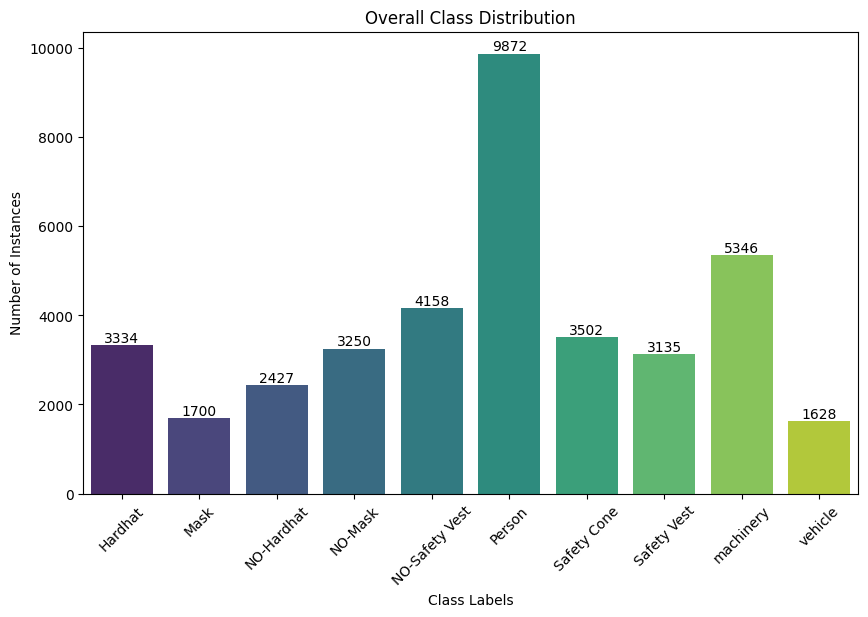

In [15]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define the class labels
class_labels = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 
                'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

# List of directories containing label files
label_dirs = [
    r'C:\Users\GGPC\Capstone\project_Capstone_Project\data\annotations\test\Test Labels',  # Replace with actual paths
    r'C:\Users\GGPC\Capstone\project_Capstone_Project\data\annotations\train\Train Labels',
    r'C:\Users\GGPC\Capstone\project_Capstone_Project\data\annotations\valid\Valid Labels'
]

# Initialize a dictionary to count each class
class_counts = {label: 0 for label in class_labels}

# Iterate through each label directory
for label_dir in label_dirs:
    print(f"Processing directory: {label_dir}")  # Debugging line
    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(label_dir, label_file), 'r') as f:
                for line in f:
                    class_idx = int(line.split()[0])
                    class_counts[class_labels[class_idx]] += 1

# Plot the class distribution
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='viridis')

for i in range(len(class_counts)):
    ax.text(i, list(class_counts.values())[i], str(list(class_counts.values())[i]), ha='center', va='bottom')

plt.title('Overall Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

### Overall Class Labels Distribution - Key Observations:
- **Dominant Class:** 
  - The ‘Person’ class is the most dominant, with a significantly higher number of instances than any other class.

- **Underrepresented Classes:**
  - ‘Mask’ and ‘Vehicle’ are the least represented classes in the dataset.

- **Safety Compliance Indicators:**
  - Moderate representation of safety gear such as "Hardhat" (3,334 instances), "Safety Vest" (3,135 instances), and "Mask" (1,700 instances).

- **Non-Compliance Indicators:**
  - Varying representation of non-compliance indicators, with "NO-Safety Vest" having a notable count (4,158 instances).


Processing directory: C:\Users\GGPC\Capstone\project_Capstone_Project\data\annotations\test\Test Labels


C:\Users\GGPC\AppData\Local\Temp\ipykernel_55380\3057441801.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='viridis')


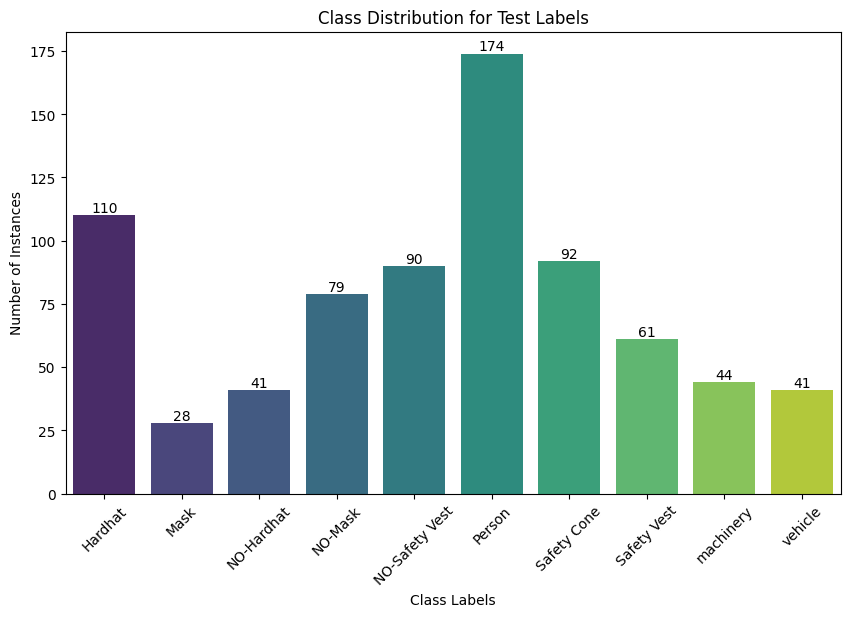

Processing directory: C:\Users\GGPC\Capstone\project_Capstone_Project\data\annotations\train\Train Labels


C:\Users\GGPC\AppData\Local\Temp\ipykernel_55380\3057441801.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='viridis')


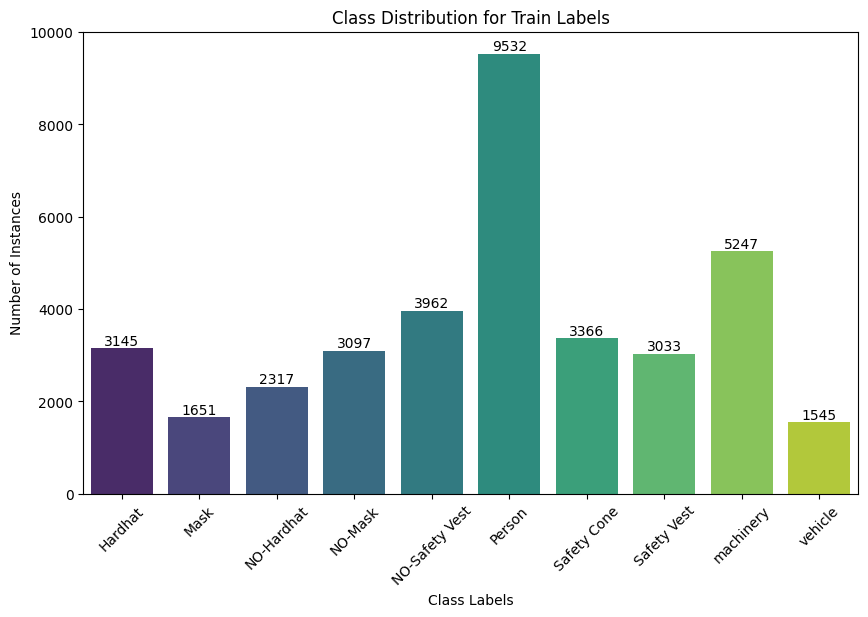

C:\Users\GGPC\AppData\Local\Temp\ipykernel_55380\3057441801.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='viridis')


Processing directory: C:\Users\GGPC\Capstone\project_Capstone_Project\data\annotations\valid\Valid Labels


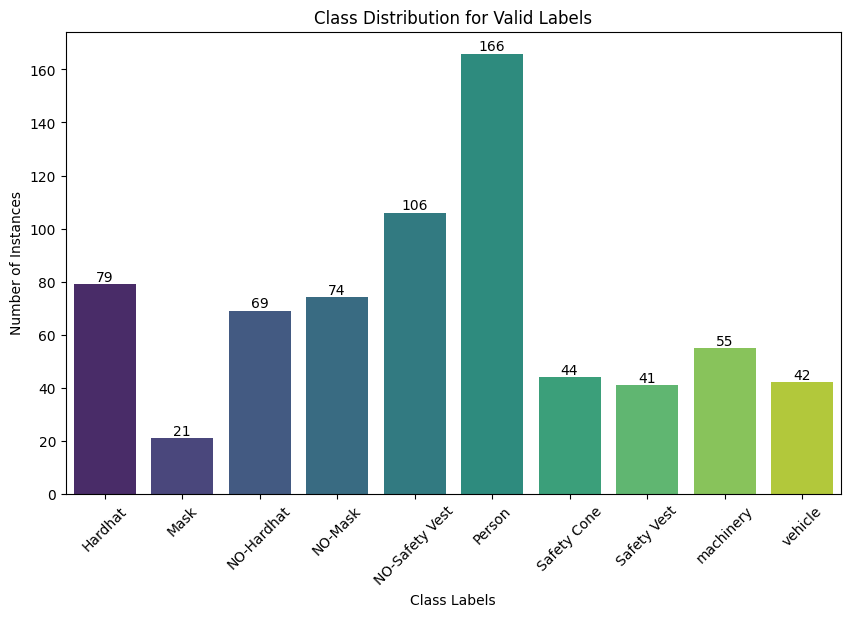

In [16]:

# Define the class labels
class_labels = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 
                'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

# List of directories containing label files
label_dirs = [
    r'C:\Users\GGPC\Capstone\project_Capstone_Project\data\annotations\test\Test Labels',  # Replace with actual paths
    r'C:\Users\GGPC\Capstone\project_Capstone_Project\data\annotations\train\Train Labels',
    r'C:\Users\GGPC\Capstone\project_Capstone_Project\data\annotations\valid\Valid Labels'
]

# Iterate through each label directory and plot class distribution
for label_dir in label_dirs:
    # Initialize a dictionary to count each class
    class_counts = {label: 0 for label in class_labels}

    print(f"Processing directory: {label_dir}")  # Debugging line
    
    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(label_dir, label_file), 'r') as f:
                for line in f:
                    class_idx = int(line.split()[0])
                    class_counts[class_labels[class_idx]] += 1

    # Plot the class distribution for this directory
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='viridis')
    
    for i in range(len(class_counts)):
        ax.text(i, list(class_counts.values())[i], str(list(class_counts.values())[i]), ha='center', va='bottom')
    
    plt.title(f'Class Distribution for {os.path.basename(label_dir)}')
    plt.xlabel('Class Labels')
    plt.ylabel('Number of Instances')
    plt.xticks(rotation=45)
    plt.show()

### Test Labels Class Distribution - Key Observations:
- **Imbalance in Test Dataset:**
  - The "Person" class has the highest representation (174 instances), followed by "Safety Cone" (92 instances) and "Hardhat" (110 instances).
  - The "Mask" class is notably underrepresented with only 28 instances, and other classes like "Vehicle," "NO-Hardhat," and "Machinery" also have lower representation.

### Train Labels Class Distribution - Key Observations:
- **Dominant Class:** 
  - The "Person" class dominates with 9,532 instances, significantly outnumbering other classes.

- **Other Notable Classes:**
  - "Machinery" (5,247 instances) and "NO-Safety Vest" (3,962 instances) have relatively high representation.
  
- **Underrepresented Classes:**
  - "Mask" (1,651 instances) and "Vehicle" (1,545 instances) are underrepresented, which may pose challenges during model training.

### Valid Labels Class Distribution - Key Observations:
- **Dominant Class:**
  - The "Person" class remains the highest represented with 166 instances, similar to the trends in training and test datasets.

- **Underrepresented Class:**
  - The "Mask" class is significantly underrepresented with only 21 instances, making it one of the most underrepresented categories in the validation set.

### Label Distribution Conclusion:
- **Consistent Imbalance:**
  - Across overall, training, test, and validation datasets, there is a consistent pattern of imbalance. The dataset images mostly associate people with the presence or absence of PPE gear, resulting in the ‘Person’ class overwhelmingly dominating all other datasets.
  
- **Critical Underrepresentation:**
  - Critical classes like ‘Mask’ and ‘Vehicle’ are underrepresented, which could affect the model's performance in detecting these essential safety features.

## Image to Label Observation

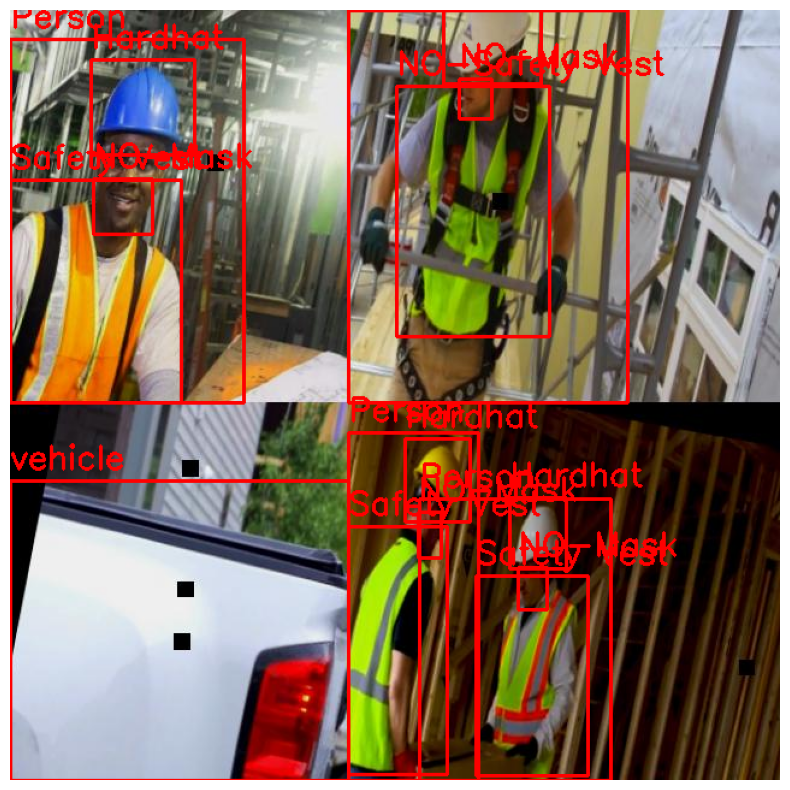

In [3]:
# Function to draw bounding boxes
def draw_bounding_boxes(image_path, label_path, class_labels):
    img = cv2.imread(image_path)
    img_height, img_width, _ = img.shape
    
    with open(label_path, 'r') as f:
        lines = f.readlines()
    
    for line in lines:
        components = line.strip().split()
        class_idx = int(components[0])
        x_center, y_center, width, height = map(float, components[1:])
        
        # Convert normalized coordinates to absolute pixel values
        x_center *= img_width
        y_center *= img_height
        width *= img_width
        height *= img_height
        
        #Calculate the top-left corner of the bounding box
        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)
        
        #draw bounding box
        color = (0, 0, 255)
        img = cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, class_labels[class_idx], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    
# Just one image

image_path = r'C:\Users\GGPC\Capstone\project_Capstone_Project\data\images\train\01261_jpg.rf.ee044d42291843f1358960c4d8c1d466.jpg'
label_path = r'C:\Users\GGPC\Capstone\project_Capstone_Project\data\annotations\train\Train Labels\01261_jpg.rf.ee044d42291843f1358960c4d8c1d466.txt'
class_labels = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 
                'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

draw_bounding_boxes(image_path, label_path, class_labels)

Visualisation shows correct locations of bounding boxes and its corresponding class labels.